In [2]:
import pandas as pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pandas.read_csv('data/train.csv')

print(data.head())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [3]:
data.dropna(inplace=True)

data['pickup_datetime'] = pandas.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pandas.to_datetime(data['dropoff_datetime'])

In [4]:
data['pickup_datetime'] = pandas.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pandas.to_datetime(data['dropoff_datetime'])
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
data['pickup_month'] = data['pickup_datetime'].dt.month
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data['dropoff_dayofweek'] = data['dropoff_datetime'].dt.dayofweek
data['dropoff_month'] = data['dropoff_datetime'].dt.month

In [5]:
X = data[['pickup_hour', 'pickup_dayofweek', 'pickup_month', 'dropoff_hour', 'dropoff_dayofweek', 'dropoff_month', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10506968.393152555


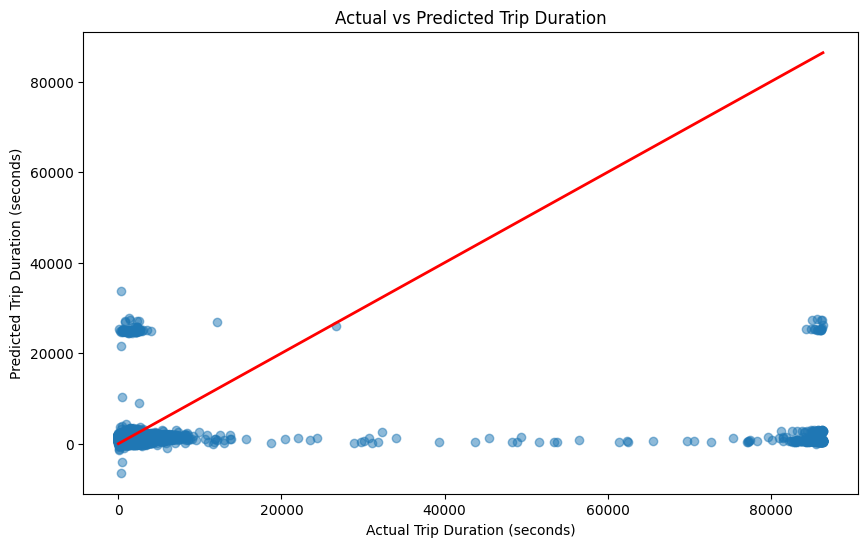

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Trip Duration (seconds)')
plt.ylabel('Predicted Trip Duration (seconds)')
plt.title('Actual vs Predicted Trip Duration')
plt.show()

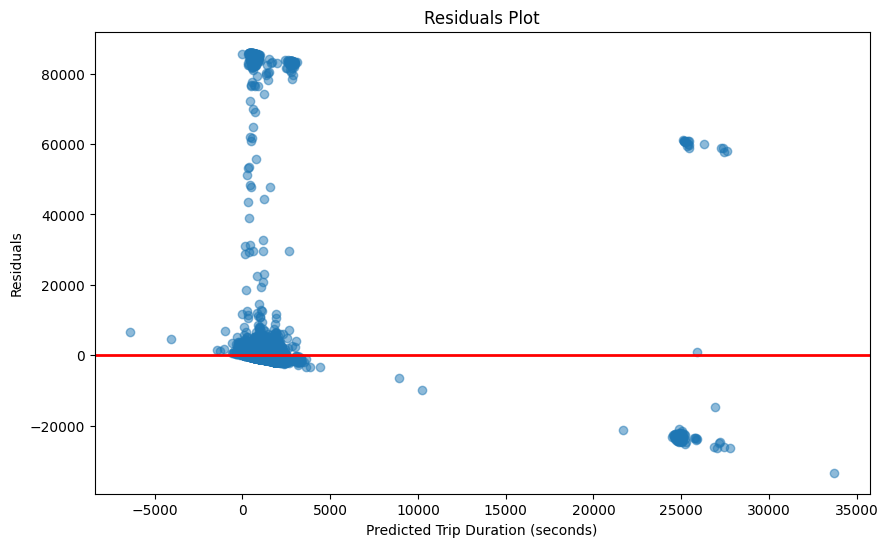

In [9]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Trip Duration (seconds)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()